In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dlib

In [2]:
#Reading the .csv file
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#Using info() & describe() methods
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

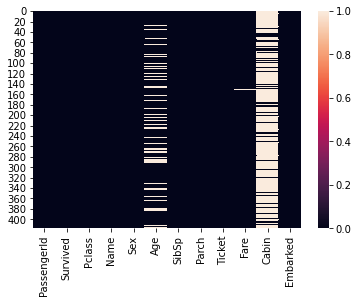

In [6]:
#Checking for null values through heat map
sns.heatmap(df.isnull())

In [7]:
#Deleting unnecessarty cols
df.drop(['PassengerId','Cabin','Name','Ticket','Fare'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


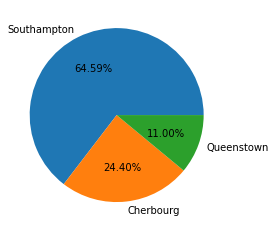

In [8]:
#Checking for Embarked
plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'],autopct='%2.2f%%')
plt.show()

<AxesSubplot:>

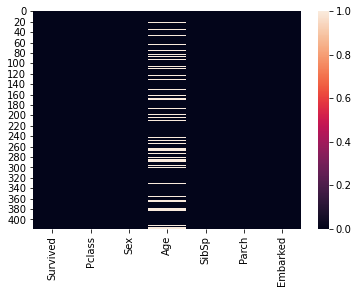

In [9]:
#Checking for null values through heat map
sns.heatmap(df.isnull())

In [10]:
#Filling null values in Age coln
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.467290,40.918367,0.476636,0.383178
2,0.322581,28.777500,0.376344,0.344086
3,0.330275,24.027945,0.463303,0.417431


In [16]:
df['Age'].fillna((40.92+28.78+24.03)/3,inplace=True)

In [17]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.500000,0,0,Q
1,1,3,female,47.000000,1,0,S
2,0,2,male,62.000000,0,0,Q
3,0,3,male,27.000000,0,0,S
4,1,3,female,22.000000,1,1,S
5,0,3,male,14.000000,0,0,S
6,1,3,female,30.000000,0,0,Q
7,0,2,male,26.000000,1,1,S
8,1,3,female,18.000000,0,0,C
9,0,3,male,21.000000,2,0,S


In [18]:
#Taking column names
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [24]:
#Spliting the data
from sklearn.model_selection import train_test_split
X=df[['Pclass', 'Age', 'SibSp', 'Parch']]
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
#Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Predicting the ans
y_pred=LR.predict(X_test)

In [27]:
#Finding Accuracy using accuracy_score
accuracy_score(y_test,y_pred)*100

70.63492063492063

In [28]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[83,  2],
       [35,  6]], dtype=int64)

In [29]:
#Finding Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        85
           1       0.75      0.15      0.24        41

    accuracy                           0.71       126
   macro avg       0.73      0.56      0.53       126
weighted avg       0.72      0.71      0.63       126

